## Homework 05: due 2022/05/18 23:59(100%)

### - There are differences between every OpenCV version, please use the version 4.4.0.40 to avoid generating bugs.  

### - Tutorial : 
1. Feature extraction and matching: https://docs.opencv.org/4.4.0/db/d27/tutorial_py_table_of_contents_feature2d.html
2. Feature detectors (ORB & FAST): https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf 
                   
### - After you go through the tutorials, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [2]:
# Set up the environment
## Install opencv with version 4.4.0
!pip3 install opencv-python==4.4.0.40

     |████████████████████████████████| 49.4 MB 1.8 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
# Download the images
!gdown --id "1LaYcBfYtjdze8pCBPTfMjnTFOp46B7yC" --output ./test1.jpg
!gdown --id "1VlOx8bBkzPSrn6AEeZ2-pgl-a6F3vtzO" --output ./test2.jpg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1LaYcBfYtjdze8pCBPTfMjnTFOp46B7yC
To: /content/test1.jpg
100% 221k/221k [00:00<00:00, 96.5MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1VlOx8bBkzPSrn6AEeZ2-pgl-a6F3vtzO
To: /content/test2.jpg
100% 221k/221k [00:00<00:00, 74.6MB/s]


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 1. Feature detector (40%)
##### Please use the following feature detectors (FAST, ORB, SIFT) and draw the feature points on the __test1.jpg__ images.
###### (Example figure)
![figure1.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure1.jpg?raw=true)

In [5]:
test1 = cv2.imread('./test1.jpg',0)
test2 = cv2.imread('./test2.jpg',0)

In [6]:
orb = cv2.ORB_create()
sift = cv2.SIFT_create()
fast = cv2.FastFeatureDetector_create()

In [7]:
kporb = orb.detect(test1,None)
kporb , _ = orb.compute(test1, kporb)
kpsift = sift.detect(test1,None)
kpfast = fast.detect(test1,None)

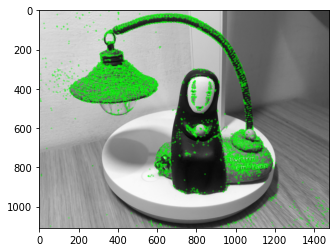

Number of Keypoints Detected In The Training Image:  5870


In [19]:

test1fast = cv2.drawKeypoints(test1, kpfast, None, color=(0,255,0))
plt.imshow(test1fast), plt.show()
print("Number of Keypoints Detected In The Training Image: ", len(kpfast))

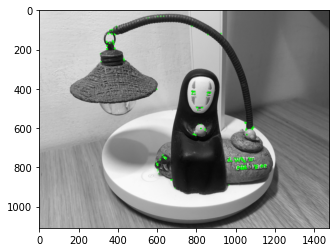

Number of Keypoints Detected In The Training Image:  500


In [18]:

test1orb = cv2.drawKeypoints(test1, kporb, None, color=(0,255,0), flags=0)
plt.imshow(test1orb), plt.show()
print("Number of Keypoints Detected In The Training Image: ", len(kporb))

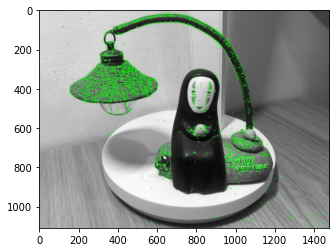

Number of Keypoints Detected In The Training Image:  2988


In [20]:

test1sift=cv2.drawKeypoints(test1,kpsift,test1, color=(0,255,0))
plt.imshow(test1sift), plt.show()
print("Number of Keypoints Detected In The Training Image: ", len(kpsift))

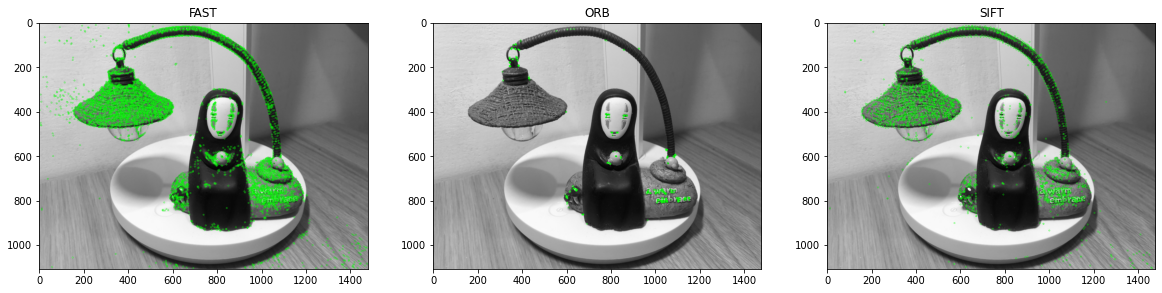

In [14]:
fx, plots = plt.subplots(1, 3, figsize=(20,10))
plots[0].set_title("FAST")
plots[0].imshow(test1fast, cmap='gray')
plots[1].set_title("ORB")
plots[1].imshow(test1orb, cmap='gray')
plots[2].set_title("SIFT")
plots[2].imshow(test1sift, cmap='gray')

#### 2. Feature matching (60%)
##### Please match the feature points from the __test1.jpg__ and __test2.jpg__.Also, please apply Lowe's ratio test (with ratio 0.6 and 0.8) to match the features and observe the differences when adjusting the ratio.
##### 2.1 Please use __SIFT__ as feature detector and descriptor.(30%) 
###### (Example figure)
![figure2.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure2.jpg?raw=true)


there are 230 good matches in sift ratio=0.6
there are 525 good matches in sift ratio=0.8


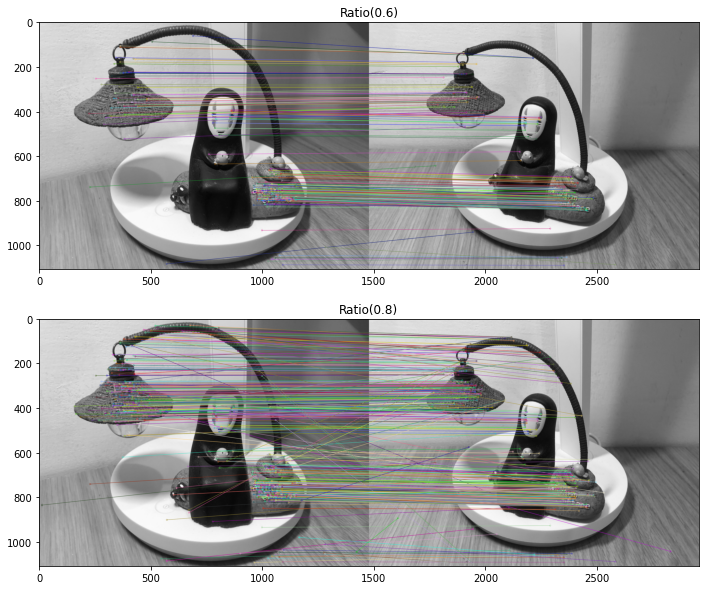

In [40]:
train_keypoints, train_descriptor = sift.detectAndCompute(test1, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test2, None)
ratiolow = 0.6
ratioup = 0.8
bf = cv2.BFMatcher()
matches = bf.knnMatch(train_descriptor, test_descriptor,k=2)
good=[]
for m,n in matches:
  if m.distance < ratiolow * n.distance:
    good.append([m])
print("there are %d good matches in sift ratio=0.6" %(len(good)))
result1 = cv2.drawMatchesKnn(test1, train_keypoints, test2, test_keypoints, good, None, flags = 2)
good=[]
for m,n in matches:
  if m.distance < ratioup * n.distance:
    good.append([m])
print("there are %d good matches in sift ratio=0.8" %(len(good)))
result2 = cv2.drawMatchesKnn(test1, train_keypoints, test2, test_keypoints, good, None, flags = 2)

fx, plots = plt.subplots(2, 1, figsize=(20,10))
plots[0].set_title("Ratio(0.6)")
plots[0].imshow(result1, cmap='gray')
plots[1].set_title("Ratio(0.8)")
plots[1].imshow(result2, cmap='gray')


##### 2.2 Please use __ORB__ as feature detector and descriptor.(30%) 
###### (Example figure)
![figure3.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure3.jpg?raw=true)

there are 8 good matches in orb ratio=0.6
there are 70 good matches in orb ratio=0.8


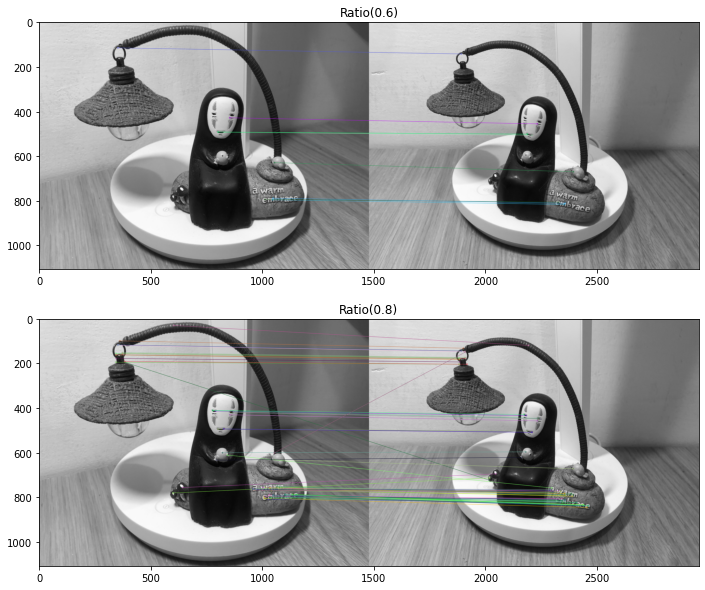

In [39]:
train_keypoints, train_descriptor = orb.detectAndCompute(test1, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test2, None)
ratiolow = 0.6
ratioup = 0.8
bf = cv2.BFMatcher()
matches = bf.knnMatch(train_descriptor, test_descriptor,k=2)
good=[]
for m,n in matches:
  if m.distance < ratiolow * n.distance:
    good.append([m])

print("there are %d good matches in orb ratio=0.6" %(len(good)))
result1 = cv2.drawMatchesKnn(test1, train_keypoints, test2, test_keypoints, good, None, flags = 2)
good=[]
for m,n in matches:
  if m.distance < ratioup * n.distance:
    good.append([m])
    
print("there are %d good matches in orb ratio=0.8" %(len(good)))
result2 = cv2.drawMatchesKnn(test1, train_keypoints, test2, test_keypoints, good, None, flags = 2)

fx, plots = plt.subplots(2, 1, figsize=(20,10))
plots[0].set_title("Ratio(0.6)")
plots[0].imshow(result1, cmap='gray')
plots[1].set_title("Ratio(0.8)")
plots[1].imshow(result2, cmap='gray')